In [1]:
import pandas as pd
import numpy as np
import requests as re
import tweepy
import json
import io

# Gathering

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
print(twitter_archive_df.columns)
twitter_archive_df.head()

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# connecting to image predictions tsv file via requests library
image_predictions = re.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
image_predictions.status_code

200

In [6]:
rawData = image_predictions.content
image_predictions_df = pd.read_csv(io.StringIO(rawData.decode('utf-8')), sep='\t')

In [7]:
type(rawData)

bytes

In [8]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#connecting to twitter API (consumer_key, consumer_secret, access_token, access_secret removed for privacy)
# consumer_key = 
# consumer_secret =
# access_token = 
# access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#json parser will output tweet info in dictionary format
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [483]:
type(auth)

tweepy.auth.OAuthHandler

In [18]:
type(api)

tweepy.api.API

In [20]:
tweet = api.get_status(id = '892420643555336193')
# print(tweet)
print(type(tweet))
print(tweet.keys())

<class 'dict'>
dict_keys(['id', 'geo', 'place', 'source', 'in_reply_to_screen_name', 'in_reply_to_status_id_str', 'text', 'retweeted', 'contributors', 'retweet_count', 'in_reply_to_user_id_str', 'truncated', 'coordinates', 'possibly_sensitive_appealable', 'id_str', 'created_at', 'extended_entities', 'in_reply_to_status_id', 'lang', 'possibly_sensitive', 'is_quote_status', 'favorite_count', 'user', 'entities', 'favorited', 'in_reply_to_user_id'])


In [21]:
tweet = api.get_status(id = '892177421306343426', tweet_mode='extended')

In [22]:
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'sizes': {'large': {'h': 1600, 'resize': 'fit', 'w': 1407},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 1055},
     'small': {'h': 680, 'resize': 'fit', 'w': 598},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/0Xxu71qeIV'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/

In [23]:
type(tweet)

dict

In [24]:
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'sizes': {'large': {'h': 1600, 'resize': 'fit', 'w': 1407},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 1055},
     'small': {'h': 680, 'resize': 'fit', 'w': 598},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/0Xxu71qeIV'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/

In [25]:
tweet['id']

892177421306343426

In [26]:
tweet['favorite_count']

33657

In [11]:
test_list = [892420643555336193, 892177421306343426, 891815181378084864, 891689557279858688, 891327558926688256]

In [12]:
test_list

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256]

In [30]:
# takes a while to run. uncomment lines below if necessary

# #for testing Create a list with some ids 4-5 are ok and loop in this, so you don't have to wait half an hour each time.
# for tweet_id in test_list:

# with open('tweet_json.txt', 'a+', encoding='utf-8') as file:
#     for tweet_id in twitter_archive_df['tweet_id']:
#         try:
#             tweet = api.get_status(id = tweet_id, tweet_mode='extended')
#             file.write(json.dumps(tweet))
#             file.write('\n')
#         except:
#             pass
    
# file.close()

Rate limit reached. Sleeping for: 675


In [9]:
# import json objects from .txt file into a list

with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [10]:
tweets_df = pd.DataFrame(status)

In [11]:
tweets_df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2074 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [13]:
tweets_df = pd.DataFrame(tweets_df, columns = ['id', 'retweeted','retweet_count','favorite_count'])

In [14]:
tweets_df.head()

,id,retweeted,retweet_count,favorite_count
0,892420643555336193,False,8778,39308
1,892177421306343426,False,6431,33657
2,891815181378084864,False,4269,25363
3,891689557279858688,False,8867,42692
4,891327558926688256,False,9646,40841


# Assessing

In [15]:
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
# archived tweets imported from .csv file
twitter_archive_df.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
twitter_archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
146,863471782782697472,NaN,NaN,2017-05-13 19:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Quinn. She's quite...,8.630625e+17,4.196984e+09,2017-05-12 16:05:02 +0000,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None


In [18]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
twitter_archive_df['timestamp'].value_counts(ascending=True)[:10]

2015-11-23 00:30:28 +0000    1
2016-07-15 17:56:40 +0000    1
2016-08-31 15:58:28 +0000    1
2015-11-21 02:07:05 +0000    1
2015-12-28 05:02:37 +0000    1
2016-08-08 02:13:34 +0000    1
2016-02-25 01:47:04 +0000    1
2016-02-12 04:07:53 +0000    1
2016-12-27 18:24:12 +0000    1
2017-02-08 01:35:19 +0000    1
Name: timestamp, dtype: int64

In [21]:
len(twitter_archive_df['retweeted_status_id'].unique())

182

In [22]:
twitter_archive_df['name'].value_counts(ascending = False)[:20]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Daisy        7
Buddy        7
Bailey       7
Toby         7
an           7
Jax          6
Rusty        6
Name: name, dtype: int64

In [23]:
twitter_archive_df[twitter_archive_df['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
len(twitter_archive_df[pd.isnull(twitter_archive_df['expanded_urls'])])

59

In [25]:
#additional data on retweet count and favorite count extracted from tweepy API

tweets_df.tail(3)

,id,retweeted,retweet_count,favorite_count
2349,666033412701032449,False,46,127
2350,666029285002620928,False,47,131
2351,666020888022790149,False,527,2526


In [26]:
tweets_df.sample(3)

,id,retweeted,retweet_count,favorite_count
1118,730573383004487680,False,2411,5351
314,835172783151792128,False,6454,28338
1795,677187300187611136,False,1023,2948


In [27]:
tweets_df.retweeted.value_counts()

False    2352
Name: retweeted, dtype: int64

In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 4 columns):
id                2352 non-null int64
retweeted         2352 non-null bool
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: bool(1), int64(3)
memory usage: 57.5 KB


In [29]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.427301e+17,3105.955357,8167.393707
std,6.868610e+16,5132.152436,12115.422425
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,615.750000,1415.000000
50%,7.193536e+17,1452.500000,3586.500000
75%,7.991219e+17,3608.250000,10116.000000
max,8.924206e+17,78712.000000,131758.000000


In [30]:
tweets_df[tweets_df['id'].duplicated()]

,id,retweeted,retweet_count,favorite_count
5,892420643555336193,False,8778,39308
6,892177421306343426,False,6431,33657
7,891815181378084864,False,4269,25363
8,891689557279858688,False,8867,42692
9,891327558926688256,False,9646,40841


In [31]:
# image predictions imported from website address in .tsv format using requests library
image_predictions_df.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [32]:
image_predictions_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1723,819924195358416896,https://pbs.twimg.com/ext_tw_video_thumb/81992...,1,bathtub,0.100896,False,shower_curtain,0.091866,False,tub,0.049176,False
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat_belt,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True


In [33]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
image_predictions_df[image_predictions_df['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [36]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Quality Issues

In [ ]:
## need to adjust: 
# remove retweets from twitter archive
# do I then need to remove duplicates from tweets df? or will this be handled when I merge
# need to update quality issues

1. Timestamp values in twitter_archive dataframe are string type.
2. Timestamp values include more than just date.
3. Duplicates & retweets need to be in twitter_archive and tweets dataframe.
4. There are many inaccurate names under 'names' column in archived tweets dataframe. 
5. Rating numerator and rating denominator are separated in archived tweets dataframe.
6. The following columns in twitter archive dataframe are primarily missing values: ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
7. 'expanded_urls' column has 59 null values in archived tweets dataframe.
8. Entire 'retweeted' column in tweets dataframe all have the same value of 'false'.

### Tidiness Issues

1. 'id' column in tweets dataframe and 'tweet_id' in other two dataframes.
2. Dog stages are in seperated columns
3. Datasets are seperated

# Cleaning

### Quality Issues

In [37]:
# creating copies of df's to ensure I wont lose original material from any mistakes cleaning
twitter_archive_df_clean = twitter_archive_df.copy()
tweets_df_clean = tweets_df.copy()

#### Define
Convert timestamp column in twitter archive dataframe to timestamp and keep just the date.

#### Code

In [38]:
# checking the type first element in series
type(twitter_archive_df_clean.timestamp[0])

str

In [39]:
# converting the timestamp column to dateime object and then extracting out the date
twitter_archive_df_clean['timestamp'] = twitter_archive_df_clean['timestamp'].map(lambda x: pd.to_datetime(x).date())

#### Test

In [40]:
print(twitter_archive_df_clean['timestamp'][0])
type(twitter_archive_df_clean['timestamp'][0])

2017-08-01


datetime.date

In [41]:
twitter_archive_df_clean['timestamp'].sort_values(ascending=False).head()

0    2017-08-01
1    2017-08-01
2    2017-07-31
3    2017-07-30
4    2017-07-29
Name: timestamp, dtype: object

#### Define

There are many inaccurate names under 'names' column in archived tweets dataframe. ['None', 'a', 'the', 'an']

#### Code

In [42]:
twitter_archive_df_clean.name.value_counts()[:20]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Daisy        7
Buddy        7
Bailey       7
Toby         7
an           7
Jax          6
Rusty        6
Name: name, dtype: int64

In [43]:
twitter_archive_df_clean[twitter_archive_df_clean['name'] == None]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
twitter_archive_df_clean['name'].replace(to_replace=['None', 'a', 'the', 'an'], value="Unsure", inplace=True)

#### Test

In [45]:
twitter_archive_df_clean.name.value_counts()[:20]

Unsure     815
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
Bailey       7
Daisy        7
Buddy        7
Toby         7
Oscar        6
Jack         6
Leo          6
Koda         6
Jax          6
Name: name, dtype: int64

#### Define

Rating numerator and rating denominator are separated in archived tweets dataframe.

#### Code

In [46]:
twitter_archive_df_clean['rating'] = twitter_archive_df_clean['rating_numerator'] / twitter_archive_df_clean['rating_denominator'] 

In [47]:
twitter_archive_df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [48]:
twitter_archive_df_clean.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

In [49]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating'],
      dtype='object')

#### Define

Replace NaN values in 'expanded_urls' column in archived tweets dataframe.

#### Code

In [50]:
twitter_archive_df_clean['expanded_urls'].isnull().any()

True

In [51]:
len(twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean['expanded_urls'])])

59

In [52]:
twitter_archive_df_clean['expanded_urls'].fillna("Unsure", inplace=True)

#### Test

In [53]:
twitter_archive_df_clean['expanded_urls'].isnull().any()

False

#### Define

Remove duplicates & retweets in twitter_archive and tweets dataframe

#### Code

In [54]:
twitter_archive_df_clean[~pd.isnull(twitter_archive_df_clean['retweeted_status_id'])].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
19,888202515573088257,NaN,NaN,2017-07-21,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,Canela,None,None,None,None,1.3
32,886054160059072513,NaN,NaN,2017-07-15,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,Unsure,None,None,None,None,1.2
36,885311592912609280,NaN,NaN,2017-07-13,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,Lilly,None,None,None,None,1.3
68,879130579576475649,NaN,NaN,2017-06-26,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,Emmy,None,None,None,None,1.4
73,878404777348136964,NaN,NaN,2017-06-24,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",Shadow,None,None,None,None,1.3


In [55]:
twitter_archive_df_clean = twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean['retweeted_status_id'])]

In [56]:
tweets_df_clean[tweets_df_clean['id'].duplicated()]

,id,retweeted,retweet_count,favorite_count
5,892420643555336193,False,8778,39308
6,892177421306343426,False,6431,33657
7,891815181378084864,False,4269,25363
8,891689557279858688,False,8867,42692
9,891327558926688256,False,9646,40841


In [57]:
tweets_df_clean.drop_duplicates('id', inplace=True)

#### Test

In [58]:
tweets_df_clean[tweets_df_clean['id'].duplicated()]

,id,retweeted,retweet_count,favorite_count


In [60]:
twitter_archive_df_clean[~pd.isnull(twitter_archive_df_clean['retweeted_status_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating


#### Define

Remove the following columns in twitter archive dataframe that are primarily missing values: ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

#### Code

In [61]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating'],
      dtype='object')

In [62]:
twitter_archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [63]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'rating'],
      dtype='object')

#### Define

Remove 'retweeted' column in tweets dataframe since they all have the same value of 'false'.

#### Code

In [64]:
tweets_df_clean.drop(['retweeted'], axis=1, inplace=True)

#### Test

In [65]:
tweets_df_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8778,39308
1,892177421306343426,6431,33657
2,891815181378084864,4269,25363
3,891689557279858688,8867,42692
4,891327558926688256,9646,40841


### Tidiness Issues

#### Define

'id' column in tweets dataframe should be "tweet_id" to match the other two dataframes column name

#### Code

In [66]:
tweets_df_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [67]:
tweets_df_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']

#### Test

In [68]:
tweets_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Define

The dog stages should be combined into a single column e.g. "stage" column where the value could be either one of the four dog stages.

#### Code

In [69]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2175 non-null int64
timestamp        2175 non-null object
source           2175 non-null object
text             2175 non-null object
expanded_urls    2175 non-null object
name             2175 non-null object
doggo            2175 non-null object
floofer          2175 non-null object
pupper           2175 non-null object
puppo            2175 non-null object
rating           2175 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 203.9+ KB


In [70]:
twitter_archive_df_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2


In [71]:
twitter_archive_df_clean['stage'] = twitter_archive_df_clean[['doggo','floofer','pupper', 'puppo']].replace('None','').sum(1)

In [72]:
twitter_archive_df_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1, inplace=True)

#### Test

In [73]:
twitter_archive_df_clean['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [74]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating', 'stage'],
      dtype='object')

#### Define

Dataframes need to be merged into one tidy masterdataframe by 'tweet_id' column and remove any rows with null values.

#### Code

In [75]:
tweets_master_df = pd.merge(twitter_archive_df_clean, tweets_df_clean, 
                            on='tweet_id', how='inner')

tweets_master_df = pd.merge(tweets_master_df, image_predictions_df, 
                            on='tweet_id', how='inner')

#### Test

In [76]:
tweets_master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating', 'stage', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [77]:
len(tweets_master_df)

1993

In [79]:
# remaining rows with null values
tweets_master_df[tweets_master_df.isnull().any(axis=1)]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Data Analyis/Visualization & Storage

### Insights

#### #1

In [80]:
tweets_master_df.groupby(tweets_master_df["timestamp"].apply(lambda x: x.year))['timestamp'].count()

timestamp
2015    663
2016    973
2017    357
Name: timestamp, dtype: int64

The majority of tweets were published in 2016.

#### #2

In [81]:
#filtering dataframe by indexes that are in the top 10 most retweets
tweets_master_df.iloc[tweets_master_df['retweet_count'].nlargest(10).index, :]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
774,744234799360020481,2016-06-18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,Unsure,1.3,doggo,78712,130050,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
400,807106840509214720,2016-12-09,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,1.3,,62145,123953,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
809,739238157791694849,2016-06-04,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,Unsure,1.3,doggo,51810,74480,...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
309,822872901745569793,2017-01-21,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,Unsure,1.3,puppo,47668,131758,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
58,879415818425184262,2017-06-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,1.3,,45443,107357,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
333,819004803107983360,2017-01-11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,Bo,1.4,doggo,41836,94805,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
402,806629075125202948,2016-12-07,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,Unsure,1.3,,40273,83347,...,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
636,761672994376806400,2016-08-05,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,Unsure,1.0,,32997,54474,...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
108,866450705531457537,2017-05-22,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,1.3,pupper,32514,106071,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
135,859196978902773760,2017-05-02,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,quite,1.2,,32388,93826,...,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False


In [82]:
tweets_master_df.ix[774, 'text']

C:\Users\Keenan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [83]:
tweets_master_df.ix[774, 'expanded_urls']

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

<blockquote class="twitter-video" data-lang="en"><p lang="en" dir="ltr">Here&#39;s a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) <a href="https://t.co/7wE9LTEXC4">pic.twitter.com/7wE9LTEXC4</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/744234799360020481?ref_src=twsrc%5Etfw">June 18, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

 [![Enlightened AF](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)](https://twitter.com/dog_rates/status/744234799360020481/video/1 "Enlightened AF")

The tweet with the most retweets was a video of a dog in a pool walking on his hindlegs.  Pretty darn cute!

#### #3

In [84]:
#filtering dataframe by indexes that are in the top 10 most favorite
tweets_master_df.iloc[tweets_master_df['favorite_count'].nlargest(10).index, :]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,2017-01-21,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,Unsure,1.3,puppo,47668,131758,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
774,744234799360020481,2016-06-18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,Unsure,1.3,doggo,78712,130050,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
400,807106840509214720,2016-12-09,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,1.3,,62145,123953,...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
58,879415818425184262,2017-06-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,1.3,,45443,107357,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
108,866450705531457537,2017-05-22,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,1.3,pupper,32514,106071,...,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
333,819004803107983360,2017-01-11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,Bo,1.4,doggo,41836,94805,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
135,859196978902773760,2017-05-02,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,quite,1.2,,32388,93826,...,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False
93,870374049280663552,2017-06-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,1.3,,27343,84412,...,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
402,806629075125202948,2016-12-07,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,Unsure,1.3,,40273,83347,...,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
65,877736472329191424,2017-06-22,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,Aja,1.3,,19804,81132,...,2,Chesapeake_Bay_retriever,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True


In [85]:
tweets_master_df.ix[309, 'text']

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

In [86]:
tweets_master_df.ix[309, 'expanded_urls']

'https://twitter.com/dog_rates/status/822872901745569793/photo/1'

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Here&#39;s a super supportive puppo participating in the Toronto  <a href="https://twitter.com/hashtag/WomensMarch?src=hash&amp;ref_src=twsrc%5Etfw">#WomensMarch</a> today. 13/10 <a href="https://t.co/nTz3FtorBc">pic.twitter.com/nTz3FtorBc</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/822872901745569793?ref_src=twsrc%5Etfw">January 21, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

![Women's March](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

The tweet with the most favorites was a photo of a dog wearing a sign at the womens march last year. I'm not suprised that gained a lot of traction because that movement and hashtag went viral.

### Visualization

In [87]:
tweets_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 21 columns):
tweet_id          1993 non-null int64
timestamp         1993 non-null object
source            1993 non-null object
text              1993 non-null object
expanded_urls     1993 non-null object
name              1993 non-null object
rating            1993 non-null float64
stage             1993 non-null object
retweet_count     1993 non-null int64
favorite_count    1993 non-null int64
jpg_url           1993 non-null object
img_num           1993 non-null int64
p1                1993 non-null object
p1_conf           1993 non-null float64
p1_dog            1993 non-null bool
p2                1993 non-null object
p2_conf           1993 non-null float64
p2_dog            1993 non-null bool
p3                1993 non-null object
p3_conf           1993 non-null float64
p3_dog            1993 non-null bool
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 381.7+ KB


In [94]:
tweets_master_df['tweet_id'] = tweets_master_df['tweet_id'].astype(object, copy=False)
tweets_master_df['timestamp'] = pd.to_datetime(tweets_master_df['timestamp'])
tweets_master_df['retweet_count'] = tweets_master_df['retweet_count'].astype(int, copy=False)
tweets_master_df['favorite_count'] = tweets_master_df['favorite_count'].astype(int, copy=False)

In [95]:
tweets_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 21 columns):
tweet_id          1993 non-null object
timestamp         1993 non-null datetime64[ns]
source            1993 non-null object
text              1993 non-null object
expanded_urls     1993 non-null object
name              1993 non-null object
rating            1993 non-null float64
stage             1993 non-null object
retweet_count     1993 non-null int32
favorite_count    1993 non-null int32
jpg_url           1993 non-null object
img_num           1993 non-null int64
p1                1993 non-null object
p1_conf           1993 non-null float64
p1_dog            1993 non-null bool
p2                1993 non-null object
p2_conf           1993 non-null float64
p2_dog            1993 non-null bool
p3                1993 non-null object
p3_conf           1993 non-null float64
p3_dog            1993 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int32(2), int64(1), obj

In [96]:
type(tweets_master_df['timestamp'][0])

pandas._libs.tslib.Timestamp

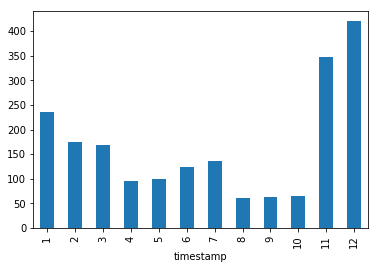

In [97]:
%matplotlib inline

# creating a bar chart grouped by months. ";" at the end prevents additional irrelevant text output with plot.
tweets_master_df.groupby(tweets_master_df["timestamp"].apply(lambda x: x.month))['timestamp'].count().plot(kind="bar");

### Storage

In [99]:
pwd

'C:\\Users\\Keenan\\datascience\\Udacity\\DA Nanodegree\\Data Wrangling\\data wrangling project'

In [100]:
tweets_master_df.to_csv('twitter_archive_master.csv', header=True)